In [17]:
import os
import math
import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Progress bar
from tqdm.auto import tqdm

In [18]:
import jax
import jax.numpy as jnp

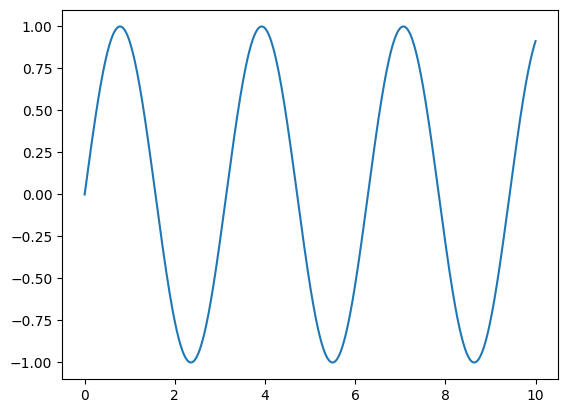

In [19]:
x_jnp = jnp.linspace(0, 10, 1000)
y_jnp = 2 * jnp.sin(x_jnp)  * jnp.cos(x_jnp)
plt.plot(x_jnp, y_jnp)

In [20]:
type(x_jnp)

jaxlib.xla_extension.ArrayImpl

In [21]:
# Numpy arrays are mutable
x = np.arange(10)
x[0] = 10
print(x)

[10  1  2  3  4  5  6  7  8  9]


In [22]:
# Jax arrays are immutable
x = jnp.arange(10)
x[0] = 10

TypeError: JAX arrays are immutable and do not support in-place item assignment. Instead of x[idx] = y, use x = x.at[idx].set(y) or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [23]:
# For updating idividual elements Jax uses 'indexed update syntax' returning a copy
y = x.at[0].set(10)
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[10  1  2  3  4  5  6  7  8  9]


In [24]:
# jax.Array is the appropiate annotation for a jax array
isinstance(y, jax.Array)

True

In [25]:
# devices method lets you inspect where the contents of the array are stored
x.devices()

{TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0)}

In [26]:
# an array can be sharded across multiple devices and can be inspected
x.sharding

SingleDeviceSharding(device=TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0), memory_kind=device)

Jax runs operations one at a time, in sequence. Using just-in-time (JIT) compilation decorator, sequences can be optimized together and run at once. The requirment is that array shapes are static and known at compile time.

In [27]:
def norm(X):
  X = X - X.mean(0)
  return X / X.std(0)

In [28]:
from jax import jit
norm_compiled = jit(norm)

In [ ]:
np.random.seed(1701)
X = jnp.array(np.random.rand(10000, 10))